In [1]:
cd

/home/jarmijo


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os,sys
from glob import glob
from DeepLensingFlow.LensingUtils import *
from lenstools import ConvergenceMap
from astropy import units as u
sys.modules['mpi4py']=None
#import contextlib
#from torchvision import transforms
#from PIL import Image
from matplotlib.ticker import ScalarFormatter

/home/jarmijo/.pyenv/versions/apps3/lib/python3.7/site-packages/lenstools/utils/mpi.py:15: UserWarning: Could not import mpi4py! (if you set sys.modules['mpi4py']=None please disregard this message)
  warnings.warn(wmsg)


In [3]:
import matplotlib.pyplot as plt

In [4]:
plt.style.use('/home/jarmijo/pltstyle.mplstyle')

In [5]:
def NFgen2KappaMap(data_dir,log_mu,log_sigma):
    list_data = glob(data_dir)
    Nmaps = len(list_data)
    img_pixels = [np.load(l) for l in list_data]
    img_normed = pixel2normval(img_pixels)
    NF_kappa_lognorm = unnormdata(img_normed)
    #log_mu_rand,log_sigma_rand = random_mu_sigma_sample(Nmaps,log_mu,log_sigma)
    #NF_kappa = desgaussianize(NF_kappa_lognorm,log_mu,log_sigma)
    return NF_kappa

def KappaSummaryStatistic(kmaps,l_edges,angle=10*u.deg,smoothing_length=2*u.arcmin):
    lenstools_kmaps = [ConvergenceMap(k,angle=angle) for k in kmaps]
    std_maps = np.std(kmaps)
    lenstools_kmaps_smoothed =[kmap.smooth(scale_angle=smoothing_length) for kmap in lenstools_kmaps] 
    
    S1 = [] 
    S2 = []
    S3 = []
    
    thresholds = np.linspace(-2*std_maps,4*std_maps,21)
    for kmap,kmap_s in zip(lenstools_kmaps,lenstools_kmaps_smoothed):
        PS_kappa = kmap.powerSpectrum(l_edges)
        PDF_kappa = kmap_s.pdf(thresholds, norm=False)
        MF_kappa = kmap_s.minkowskiFunctionals(thresholds, norm=False)
        S1.append(PS_kappa)
        S2.append(PDF_kappa)
        #S3.append(MF_kappa)
    return S1,S2#,S3

## CosmoGrid

In [ ]:
#S_PS = np.array([CosmoGrid_PS[0][0],CosmoGrid_PS_mean]).T
#S_PDF = np.array([CosmoGrid_PDF[0][0],CosmoGrid_PDF_mean]).T

In [6]:
#np.save('/gpfs02/work/jarmijo/data/SummaryStatistics/CosmoGrid_10deg_PowerSpectrum_10000imgs_logellbins15_lmin200_lmax1500.dat',S_PS)
#np.save('/gpfs02/work/jarmijo/data/SummaryStatistics/CosmoGrid_10deg_PDF_10000imgs_kappabins20_kmin-2stdkappa_kmax4stdkappa.dat',S_PDF)
CosmoGrid_PS = np.load('/gpfs02/work/jarmijo/data/SummaryStatistics/CosmoGrid_10deg_PowerSpectrum_10000imgs_logellbins15_lmin200_lmax1500.dat.npy')
CosmoGrid_PDF = np.load('/gpfs02/work/jarmijo/data/SummaryStatistics/CosmoGrid_10deg_PDF_10000imgs_kappabins20_kmin-2stdkappa_kmax4stdkappa.dat.npy')

In [7]:
l_edges = np.logspace(np.log10(200),np.log10(1500),16)
ellmidbin = CosmoGrid_PS[:,0]#np.mean(np.array(CosmoGrid_logkappa_PS)[:,0,:],axis=0)
kappamidbin = CosmoGrid_PDF[:,0]#np.mean(np.array(CosmoGrid_logkappa_PDF)[:,0,:],axis=0)
CosmoGrid_PS_mean = CosmoGrid_PS[:,1]
CosmoGrid_PDF_mean = CosmoGrid_PDF[:,1]

In [17]:
list_CosmoGrid_maps = glob('/gpfs02/work/jarmijo/KappaMaps/CosmoGrid_10deg/*')
CosmoGrid_kappa = [np.load(l) for l in list_CosmoGrid_maps[:1000]]

In [18]:

CosmoGrid_PS,CosmoGrid_PDF = KappaSummaryStatistic(CosmoGrid_kappa,l_edges,angle=10*u.deg,smoothing_length=8*u.arcmin)

In [19]:
CosmoGrid_kappa_PS,CosmoGrid_kappa_PDF = KappaSummaryStatistic(CosmoGrid_kappa,l_edges,angle=10*u.deg,smoothing_length=8*u.arcmin)

In [20]:
CosmoGrid_PS_mean = np.mean(np.array(CosmoGrid_logkappa_PS)[:,1,:],axis=0)
CosmoGrid_PDF_mean = np.mean(np.array(CosmoGrid_logkappa_PDF)[:,1,:],axis=0)

NameError: name 'CosmoGrid_logkappa_PS' is not defined

In [21]:
CosmoGrid_PS_cov = np.cov(np.array(CosmoGrid_kappa_PS)[:,1,:].T)
CosmoGrid_PDF_cov = np.cov(np.array(CosmoGrid_kappa_PDF)[:,1,:].T)
CosmoGrid_PS_R = np.corrcoef(np.array(CosmoGrid_kappa_PS)[:,1,:].T)
CosmoGrid_PDF_R = np.corrcoef(np.array(CosmoGrid_kappa_PDF)[:,1,3:].T)

In [63]:
ellmidbin = np.mean(np.array(CosmoGrid_logkappa_PS)[:,0,:],axis=0)
kappamidbin = np.mean(np.array(CosmoGrid_logkappa_PDF)[:,0,:],axis=0)

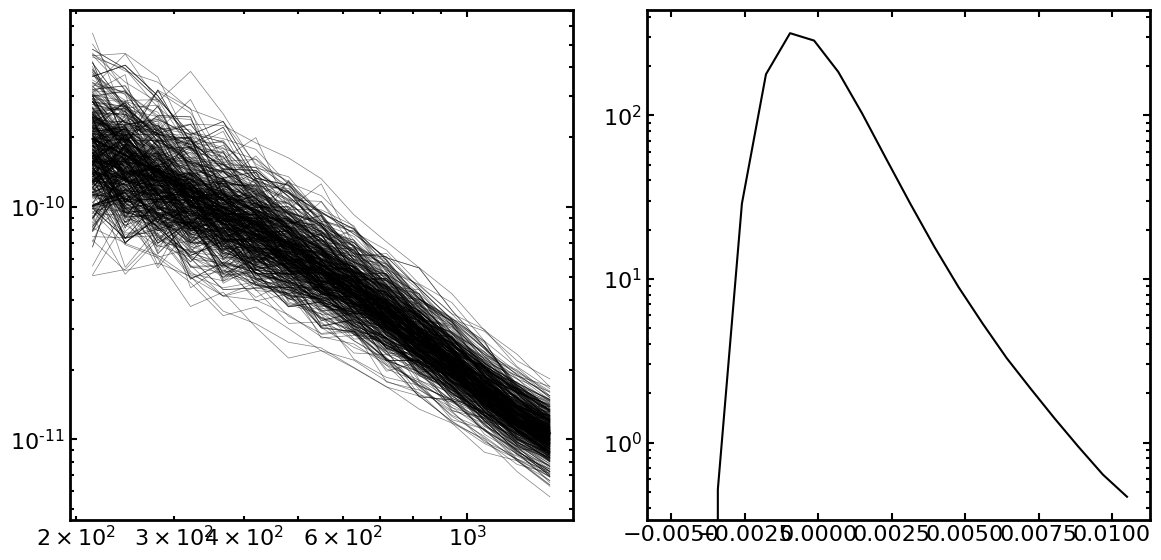

In [75]:
f,ax = plt.subplots(1,2,figsize=(12,6))
for i in range(500):
    ax[0].plot(ellmidbin,CosmoGrid_kappa_PS[i][1],'k-',alpha=0.5,lw=0.5)
ax[0].plot(ellmidbin,CosmoGrid_PS_mean,'k-')
ax[1].plot(kappamidbin,CosmoGrid_PDF_mean,'k-')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_yscale('log')
#ax[0].set_xlim(150,2e3)
plt.tight_layout()
plt.show()

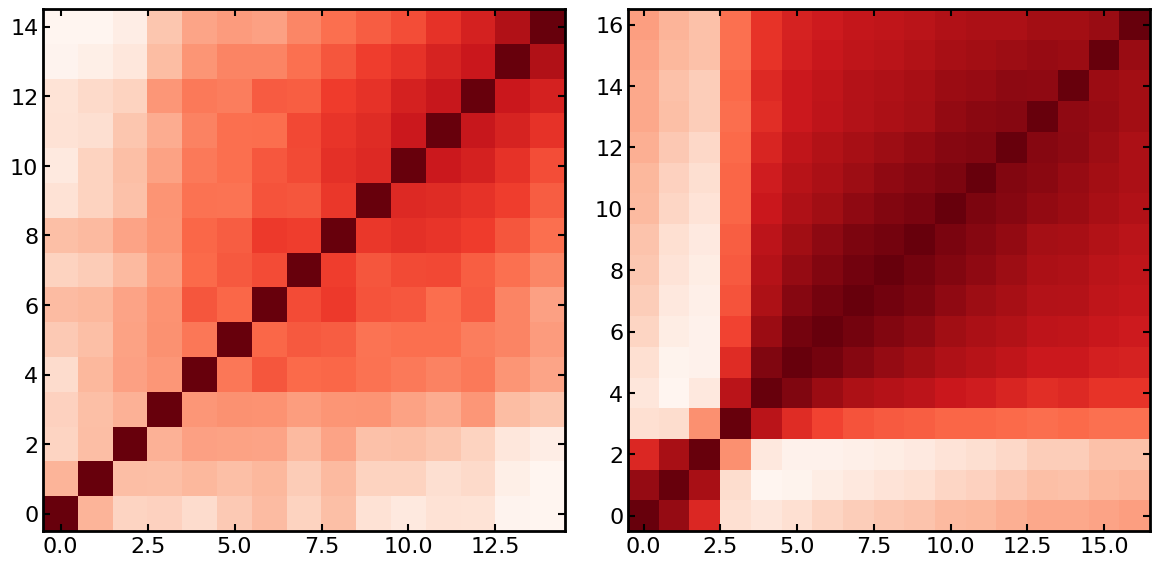

In [39]:
f,ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(CosmoGrid_PS_R,cmap='Reds',origin='lower')
ax[1].imshow(CosmoGrid_PDF_R,cmap='Reds',origin='lower')

plt.tight_layout()
plt.show()

## Normalizing flow

In [33]:
list_NF_imgs = glob('/gpfs02/work/jarmijo/data/imgs/NF/normCosmoGrid/*')
NF_imgs = [np.load(l) for l in list_NF_imgs]
NF_imgs = np.array(NF_imgs)

KeyboardInterrupt: 

In [ ]:
NF_kappa_norm = pixel2normval(NF_imgs)
NF_kappa = unnormdata(NF_kappa_norm)


In [ ]:
l_edges = np.logspace(np.log10(200),np.log10(1500),16)
NF_PS,NF_PDF = KappaSummaryStatistic(NF_kappa,l_edges)

In [ ]:
NF_PS_mean = np.mean(np.array(NF_PS)[:,1,:],axis=0)
NF_PDF_mean = np.mean(np.array(NF_PDF)[:,1,:],axis=0)

## Difussion Model

In [8]:
list_DM_imgs = glob('/gpfs02/work/jarmijo/data/imgs/Diffusion/CosmoGrid_10deg/DMgen/*')
DM_imgs = [np.load(l) for l in list_DM_imgs]
DM_imgs = np.array(DM_imgs)

In [9]:
DM_kappa = unnormdata(np.array(DM_imgs),pmin = -0.01,pmax = 0.15)
#DM_kappa = desgaussianize(DM_logkappa,log_mu_mean,log_sigma_mean)


In [10]:
DM_PS,DM_PDF = KappaSummaryStatistic(DM_kappa,l_edges)

In [11]:
DM_PS_mean = np.mean(np.array(DM_PS)[:,1,:],axis=0)
DM_PDF_mean = np.mean(np.array(DM_PDF)[:,1,:],axis=0)

In [12]:
DM_PS_cov = np.cov(np.array(DM_PS)[:,1,:].T)
#DM_PDF_cov = np.cov(np.array(DM_PDF)[:,1,:].T)
DM_PS_R = np.corrcoef(np.array(DM_PS)[:,1,:].T)
#DM_PDF_R = np.corrcoef(np.array(DM_PDF)[:,1,:].T)

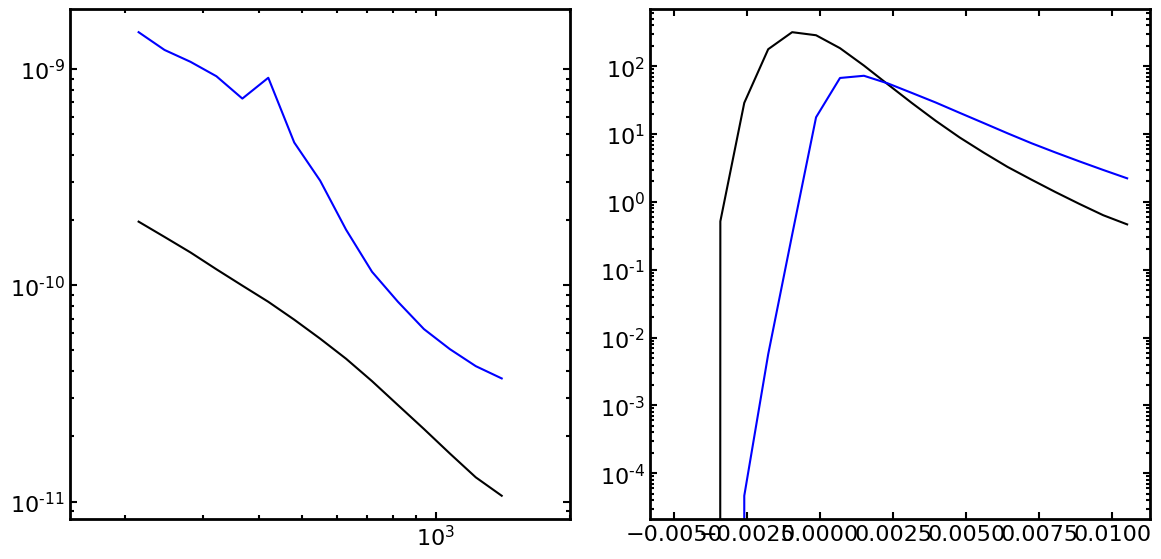

In [13]:
f,ax = plt.subplots(1,2,figsize=(12,6))
ax[0].plot(ellmidbin,CosmoGrid_PS_mean,'k-')
ax[1].plot(kappamidbin,CosmoGrid_PDF_mean,'k-')
#ax[0].plot(CosmoGrid_PS_mean[:,0],NF_PS_mean,'r-')
ax[0].plot(ellmidbin,0.4*DM_PS_mean,'b-')
#ax[1].plot(CosmoGrid_PDF_mean[:,0],NF_PDF_mean,'r-')
ax[1].plot(kappamidbin,DM_PDF_mean,'b-')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_xlim(150,2e3)
plt.tight_layout()
plt.show()

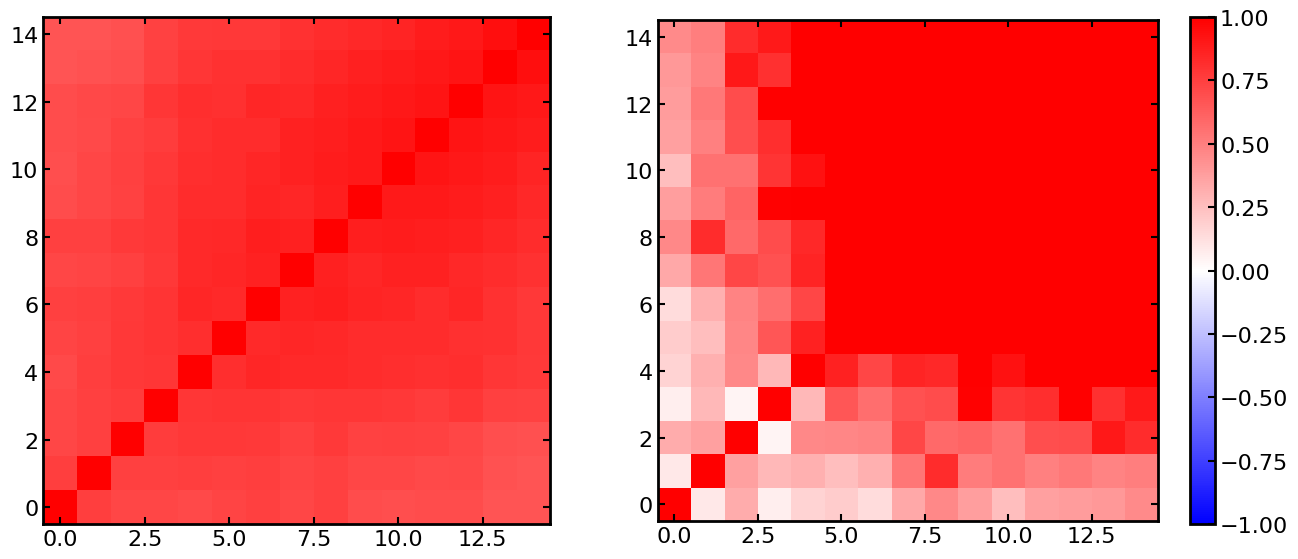

In [22]:
f,ax = plt.subplots(1,2,figsize=(14,6))
ax[0].imshow(CosmoGrid_PS_R,cmap='bwr',origin='lower',vmin=-1,vmax=1)
c1 = ax[1].imshow(4*DM_PS_R,cmap='bwr',origin='lower',vmin=-1,vmax=1)
plt.colorbar(c1,ax=ax[1])
plt.tight_layout()
plt.show()

In [25]:
0.1*np.abs(DM_PS_cov)/np.abs(CosmoGrid_PS_cov)

array([[13.12688514,  0.34227948,  1.30536331,  0.27915067,  0.61930398,
         1.03930919,  0.34160623,  0.73601035,  0.65779394,  0.48780957,
         0.28778992,  0.41054151,  0.45494588,  0.53026884,  0.65863199],
       [ 0.34227948, 10.70058826,  1.29815892,  0.97404097,  0.96763471,
         1.15246967,  0.70591671,  1.0419734 ,  1.04480923,  0.57950191,
         0.53694751,  0.49674801,  0.54537121,  0.56939157,  0.65366086],
       [ 1.30536331,  1.29815892, 10.12409626,  0.14809788,  1.36538994,
         2.0381663 ,  1.0423692 ,  1.32494373,  0.69499296,  0.65141623,
         0.50817591,  0.64806022,  0.69946744,  1.00533904,  1.0200497 ],
       [ 0.27915067,  0.97404097,  0.14809788, 10.28305453,  0.80626391,
         2.81424525,  1.22369139,  1.19901015,  0.82615227,  1.01323408,
         0.70906799,  0.74383635,  0.93592201,  0.84366143,  1.03770329],
       [ 0.61930398,  0.96763471,  1.36538994,  0.80626391,  8.1123776 ,
         3.15324111,  1.2858863 ,  1.27159767, 

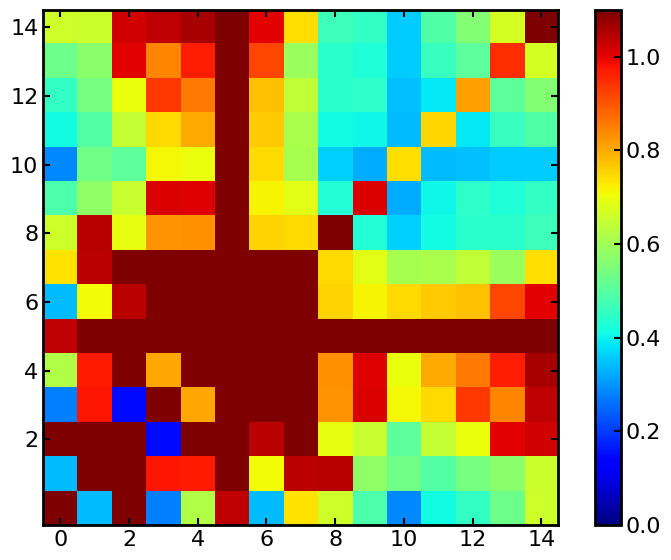

In [26]:
f,ax = plt.subplots(1,1,figsize=(8,6))
c1 = ax.imshow(0.1*np.abs(DM_PS_cov)/np.abs(CosmoGrid_PS_cov),cmap='jet',origin='lower',vmin=0,vmax=1.1)
plt.colorbar(c1,ax=ax)
#ax[1].imshow(DM_PDF_R,cmap='Reds',origin='lower')
ax.set_yticks([2,4,6,8,10,12,14])
ax.set_xticks([0,2,4,6,8,10,12,14])
plt.tight_layout()
#plt.savefig('/home/jarmijo/DeepLensingFlow/Notebooks/cov_PDF_DM_real.jpg',bbox_inches='tight')
plt.show()

In [ ]:
np.abs()

In [29]:
m_std = 0.005#np.std(CosmoGrid_kappa)

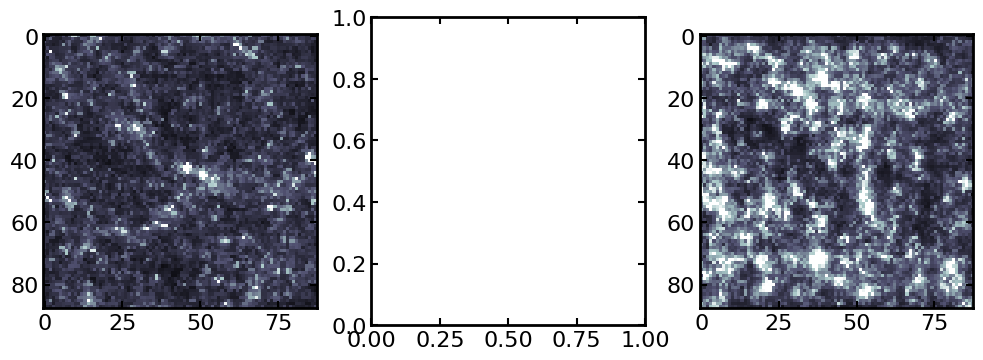

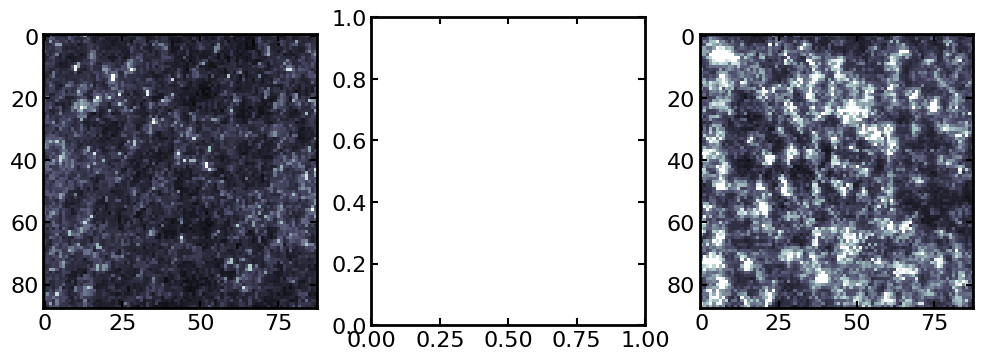

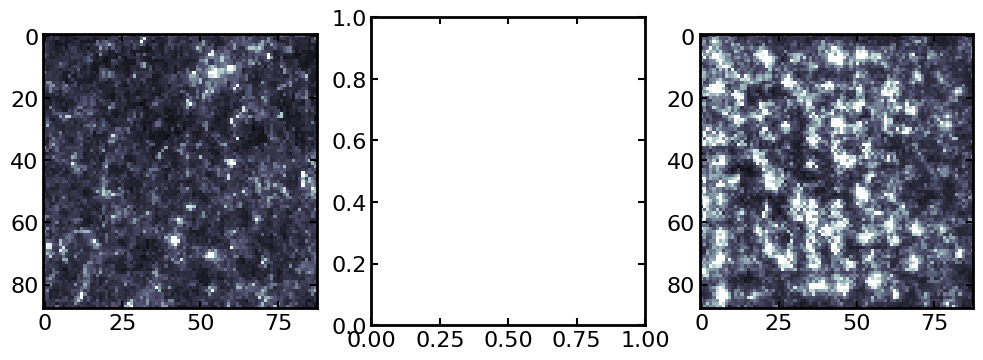

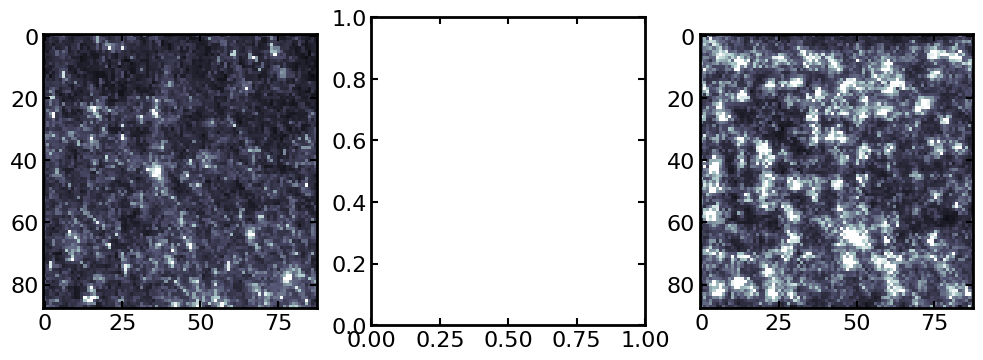

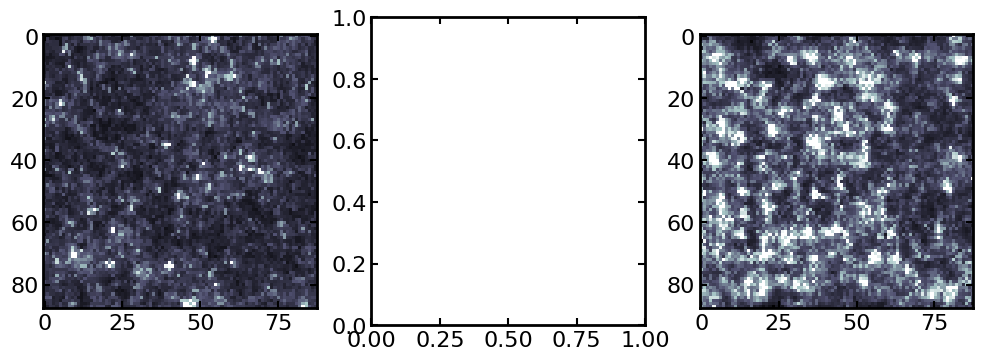

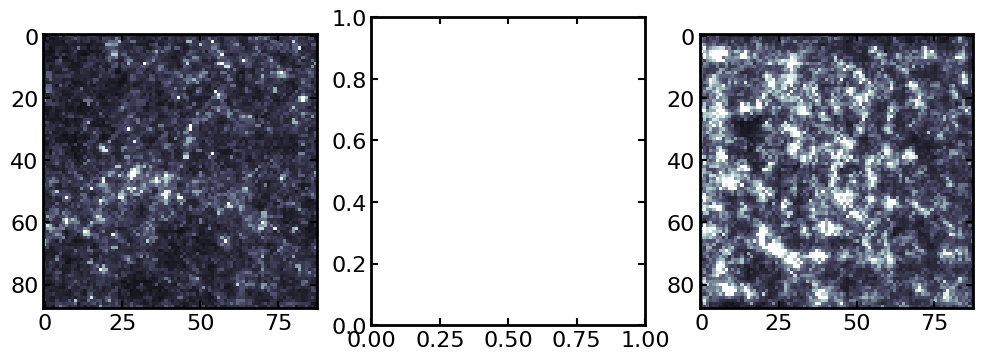

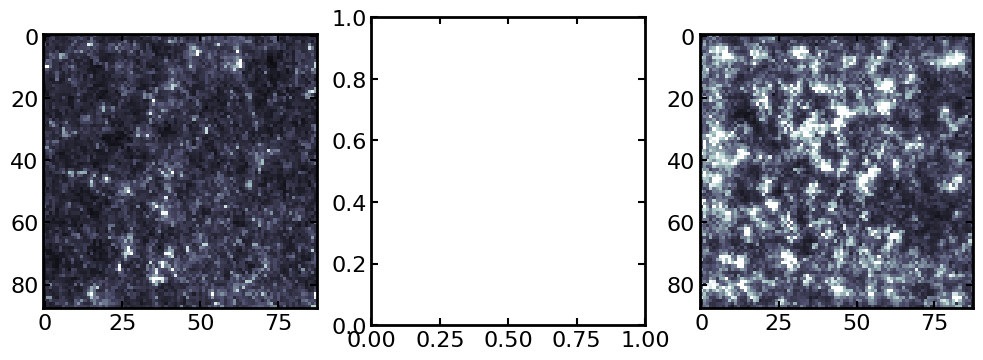

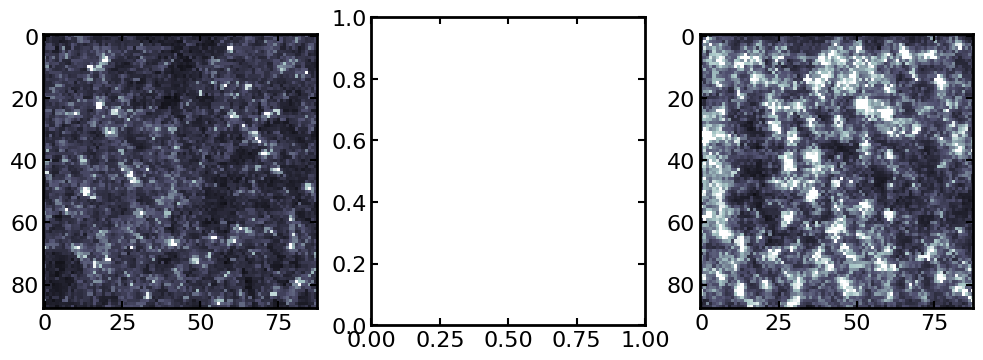

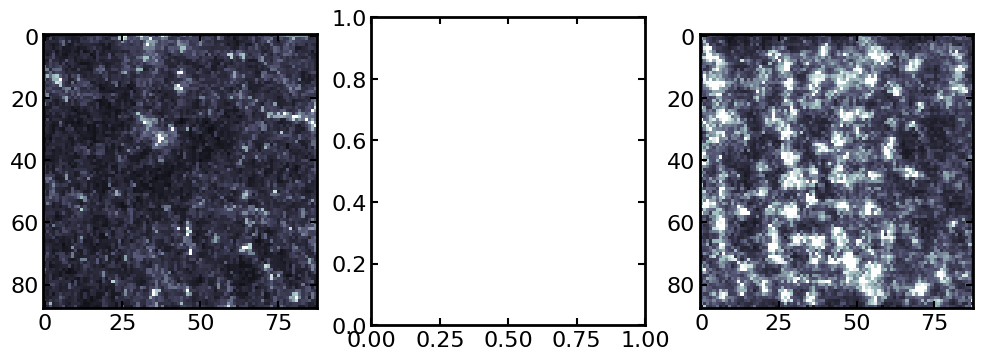

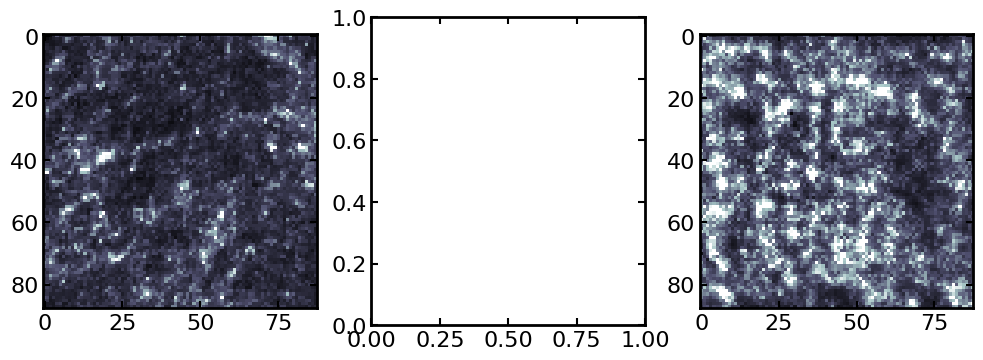

In [27]:
for i in range(10):
    f,ax = plt.subplots(1,3,figsize=(12,4))
    ax[0].imshow(CosmoGrid_kappa[i],cmap='bone',vmin=-0.005,vmax=0.015)
    #ax[1].imshow(NF_kappa[i],cmap='bone',vmin=-m_std,vmax=3*m_std)
    ax[2].imshow(DM_kappa[i],cmap='bone',vmin=-0.005,vmax=0.03)
    plt.show()

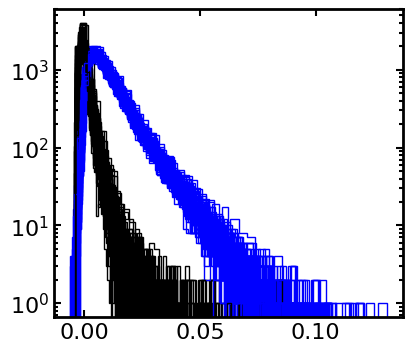

In [28]:

f,ax = plt.subplots(1,1,figsize=(4.5,4))
for i in range(100):
    ax.hist(CosmoGrid_kappa[i].flatten(),bins=35,histtype='step',ec='k')
    ax.hist(DM_kappa[i].flatten(),bins=35,histtype='step',ec='b')
    ax.set_yscale('log')
plt.show()